# Import Required Libraries
Import the necessary libraries, including GeoPandas, Shapely, and Pandas.

In [70]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import numpy as np
import geopandas as gpd
from pathlib import Path

from PIL import Image
import matplotlib.pyplot as plt

data_path = Path('London_UK')

# Load data
panoids = gpd.read_file(data_path / 'panoids/panoids.geojson')
network = gpd.read_file(data_path / 'network/edges/edges.geojson')

# Load Street Network Data
Load the street network data from a GeoJSON file or other data source.

In [71]:
# Load Street Network Data
streets = network  # Replace with your data source

# Load Image GPS Coordinates
Create a DataFrame with image IDs and their corresponding GPS coordinates.

In [72]:
# Load Image GPS Coordinates
# Create a DataFrame with image IDs and their corresponding GPS coordinates

image_data = {
    'image_id': np.linspace(0, len(panoids) - 1, len(panoids)),
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Create GeoDataFrame for Images
Convert the DataFrame to a GeoDataFrame with Point geometries and set the coordinate reference system (CRS).

In [73]:
# Create GeoDataFrame for Images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Perform Spatial Join
Use the sjoin_nearest function to find the nearest street for each image and add the distance information.

In [74]:
# Perform Spatial Join
matched = gpd.sjoin_nearest(images_gdf, streets, how='left', distance_col='distance')

# Now 'matched' contains street information for each image
matched[['image_id', 'longitude', 'latitude', 'distance'][:5][0:2]]
matched_first_row = matched.iloc[[8]]

print(matched_first_row[['image_id', 'longitude', 'latitude', 'distance']])


   image_id  longitude   latitude  distance
8       8.0  -0.111446  51.510339  0.000574


/Users/tangshiya/anaconda3/envs/DSAIE/lib/python3.9/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


In [75]:
def get_image_id_by_coords(lat, lon):
    # Find the row in the matched DataFrame that matches the given coordinates
    row = matched[(matched['latitude'] == lat) & (matched['longitude'] == lon)]
    
    if not row.empty:
        return row['image_id'].values[0]
    else:
        return None

# Example usage
latitude = 51.51033857385067  # Replace with the desired latitude
longitude = -0.1114464626242011  # Replace with the desired longitude
image_id = get_image_id_by_coords(latitude, longitude)

if image_id is not None:
    print(f"Image ID for coordinates ({latitude}, {longitude}): {image_id}")
else:
    print(f"No image found for coordinates ({latitude}, {longitude})")

Image ID for coordinates (51.51033857385067, -0.1114464626242011): 8.0


# Display Matched Results
Print or visualize the matched results, including image IDs and distances to the nearest streets.

      image_id      distance
0          0.0  4.727227e-04
1          1.0  4.652413e-04
2          2.0  4.817731e-04
3          3.0  1.958920e-05
4          4.0  3.804349e-06
...        ...           ...
9008    9008.0  9.611725e-06
9009    9009.0  7.151419e-06
9010    9010.0  3.945103e-06
9011    9011.0  4.789095e-07
9012    9012.0  5.151160e-06

[9135 rows x 2 columns]


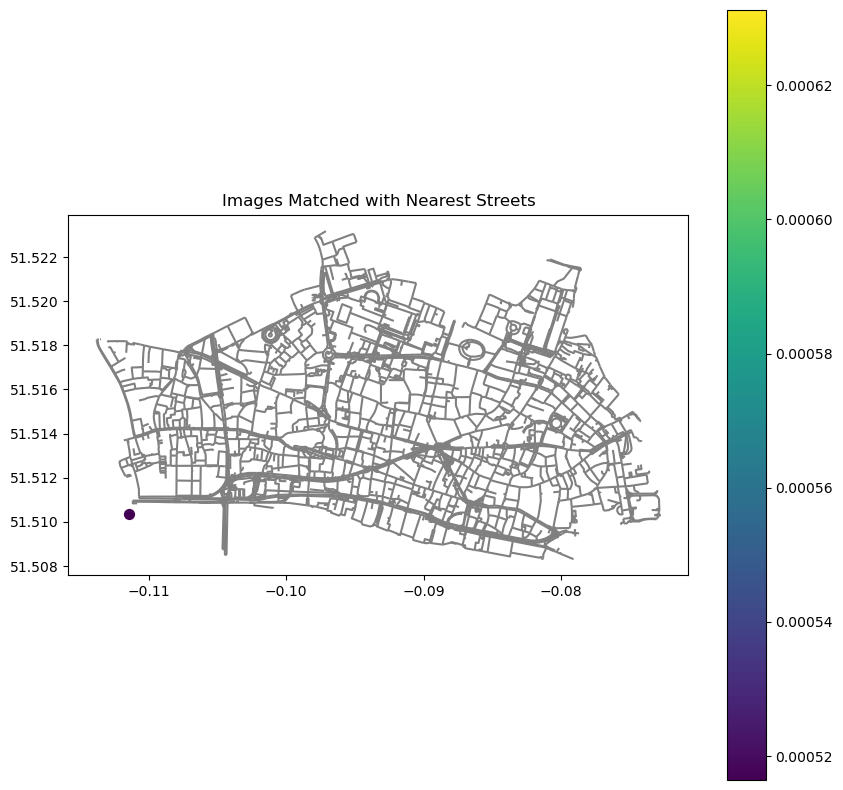

In [76]:
# Display Matched Results

# Print the matched results, including image IDs and distances to the nearest streets
print(matched[['image_id', 'distance']])

# Optionally, visualize the matched results on a map
import matplotlib.pyplot as plt

# Plot the streets
base = streets.plot(color='gray', figsize=(10, 10))

# Plot the images with distances
matched_first_row.plot(ax=base, column='distance', legend=True, cmap='viridis', markersize=50)

plt.title('Images Matched with Nearest Streets')
plt.show()

/Users/tangshiya/anaconda3/envs/DSAIE/lib/python3.9/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


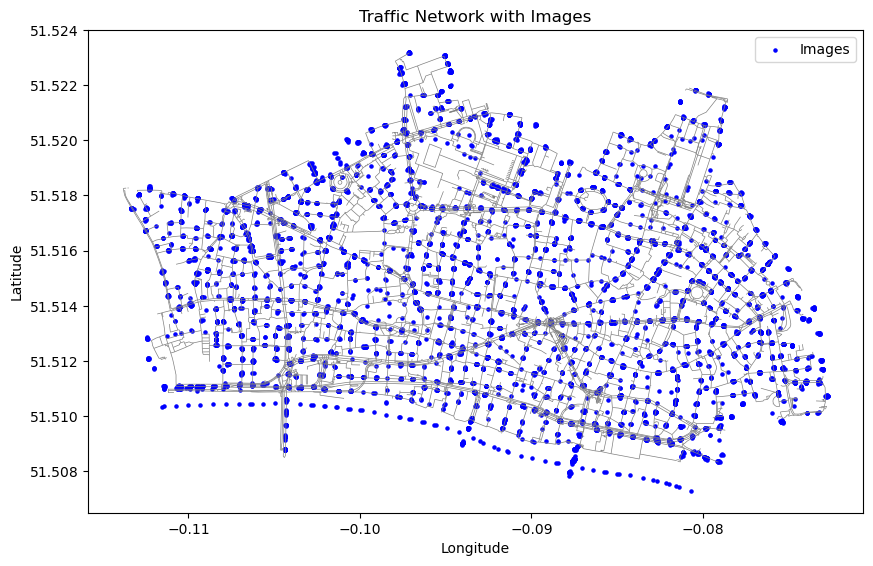

In [77]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

# Load street network data
# streets = gpd.read_file('streets.geojson')  # Replace with your data source

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3', ...],
#     'lng': [-0.10543, -0.0949, -0.10601, ...],
#     'lat': [51.51575, 51.51736, 51.51575, ...]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Perform Spatial Join to find nearest street for each image
matched = gpd.sjoin_nearest(images_gdf, streets, how='left', distance_col='distance')
# Function to get coordinates by image ID
def get_coords_by_image_id(image_id):
    row = matched[matched['image_id'] == image_id]
    if not row.empty:
        return row['geometry'].values[0].x, row['geometry'].values[0].y
    else:
        return None, None

# Visualize the traffic network with images
fig, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, color='gray', linewidth=0.5)
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images')
plt.legend()

plt.show()

In [78]:
# Re-project the streets GeoDataFrame to a projected CRS
# EPSG:27700 is the British National Grid, suitable for the UK
streets_projected = streets.to_crs(epsg=28992)

# Calculate the length of each street in the projected CRS
streets_length = streets_projected.length

# Add the lengths back to the original GeoDataFrame if needed
streets['length'] = streets_length


# Now you can use 'streets['length']' for further analysis

Buffer function python


In [79]:
import geopandas as gpd
from shapely.geometry import LineString

def split_line(line, max_segment_length=50):
    # Calculate the number of segments
    num_segments = int(line.length // max_segment_length) + 1
    segment_length = line.length / num_segments
    
    # Create a list to store the segments
    segments = []
    
    # Generate points along the line at each segment length
    for i in range(num_segments):
        start_point = line.interpolate(i * segment_length)
        end_point = line.interpolate(min((i + 1) * segment_length, line.length))
        segment = LineString([start_point, end_point])
        segments.append(segment)
    
    return segments

# Load the streets data
streets = gpd.read_file('London_UK/network/edges/edges.geojson')

# Re-project to a suitable CRS if necessary
if streets.crs.is_geographic:
    streets = streets.to_crs(epsg=28992)  # Use a projected CRS like EPSG:28992 for the Netherlands

# Calculate lengths
streets['length'] = streets.length

# Split lines longer than 100 meters
split_segments = []
for _, row in streets.iterrows():
    if row['length'] > 100:
        split_segments.extend(split_line(row['geometry'], max_segment_length=50))
    else:
        split_segments.append(row['geometry'])

# Create a new GeoDataFrame with the split segments
split_streets_gdf_max = gpd.GeoDataFrame(geometry=split_segments, crs=streets.crs)

# Optionally, calculate the new lengths
split_streets_gdf_max_L = split_streets_gdf_max.length

# Display the result
print(split_streets_gdf_max)


                                               geometry
0     LINESTRING (-224559.45 405323.931, -224588.869...
1     LINESTRING (-224588.869 405310.835, -224632.67...
2     LINESTRING (-224632.678 405322.537, -224676.53...
3     LINESTRING (-224713.082 405344.849, -224676.53...
4     LINESTRING (-224713.082 405344.849, -224736.85...
...                                                 ...
5807  LINESTRING (-224265.34 406775.406, -224232.712...
5808  LINESTRING (-224232.712 406769.725, -224197.67...
5809  LINESTRING (-224197.674 406755.318, -224161.70...
5810  LINESTRING (-224250.452 406784.135, -224247.72...
5811  LINESTRING (-224247.727 406782.858, -224182.29...

[5812 rows x 1 columns]


In [80]:
# Assuming split_streets_gdf_max and split_streets_gdf_max_L are already defined

# Add the lengths as a new column to the GeoDataFrame
split_streets_gdf_max['length'] = split_streets_gdf_max_L

# Now split_streets_gdf_max contains the length of each segment as a column
print(split_streets_gdf_max)

                                               geometry     length
0     LINESTRING (-224559.45 405323.931, -224588.869...  32.202141
1     LINESTRING (-224588.869 405310.835, -224632.67...  45.345370
2     LINESTRING (-224632.678 405322.537, -224676.53...  45.345382
3     LINESTRING (-224713.082 405344.849, -224676.53...  38.105447
4     LINESTRING (-224713.082 405344.849, -224736.85...  27.635476
...                                                 ...        ...
5807  LINESTRING (-224265.34 406775.406, -224232.712...  33.118631
5808  LINESTRING (-224232.712 406769.725, -224197.67...  37.884646
5809  LINESTRING (-224197.674 406755.318, -224161.70...  37.805940
5810  LINESTRING (-224250.452 406784.135, -224247.72...   3.009515
5811  LINESTRING (-224247.727 406782.858, -224182.29...  94.399716

[5812 rows x 2 columns]


In [81]:
import geopandas as gpd
from shapely.geometry import LineString
from shapely.ops import linemerge

def merge_short_lines(streets_gdf, min_total_length=50, max_individual_length=10):
    merged_segments = []
    current_merge = []

    for _, row in streets_gdf.iterrows():
        line = row['geometry']
        line_length = line.length

        if line_length < max_individual_length:
            current_merge.append(line)
            total_length = sum([seg.length for seg in current_merge])

            if total_length >= min_total_length:
                merged_line = linemerge(current_merge)
                merged_segments.append(merged_line)
                current_merge = []
        else:
            if current_merge:
                merged_line = linemerge(current_merge)
                merged_segments.append(merged_line)
                current_merge = []
            merged_segments.append(line)

    # If there are any remaining lines in the current merge, add them
    if current_merge:
        merged_line = linemerge(current_merge)
        merged_segments.append(merged_line)

    return gpd.GeoDataFrame(geometry=merged_segments, crs=streets_gdf.crs)



# Merge short lines
merged_streets_gdf = merge_short_lines(split_streets_gdf_max)

# Optionally, calculate the new lengths
merged_streets_gdf['length'] = merged_streets_gdf.length

merged_streets_gdf


geometry     length
0     LINESTRING (-224559.45 405323.931, -224588.869...  32.202141
1     LINESTRING (-224588.869 405310.835, -224632.67...  45.345370
2     LINESTRING (-224632.678 405322.537, -224676.53...  45.345382
3     LINESTRING (-224713.082 405344.849, -224676.53...  38.105447
4     LINESTRING (-224713.082 405344.849, -224736.85...  27.635476
...                                                 ...        ...
5029  LINESTRING (-224265.34 406775.406, -224232.712...  33.118631
5030  LINESTRING (-224232.712 406769.725, -224197.67...  37.884646
5031  LINESTRING (-224197.674 406755.318, -224161.70...  37.805940
5032  LINESTRING (-224250.452 406784.135, -224247.72...   3.009515
5033  LINESTRING (-224247.727 406782.858, -224182.29...  94.399716

[5034 rows x 2 columns]

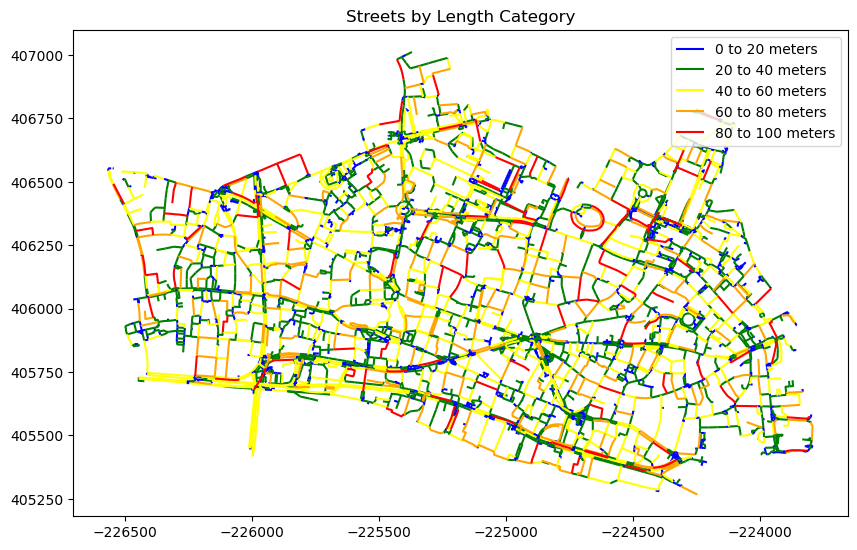

In [82]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Define a function to categorize lengths and assign colors
def categorize_and_plot(gdf):
    # Define the bins and corresponding colors
    bins = [0, 20, 40, 60, 80, 100]
    colors = ['blue', 'green', 'yellow', 'orange', 'red']
    
    # Create a new column 'category' based on the length
    gdf['category'] = np.digitize(gdf['length'], bins, right=True)
    
    # Plot each category with a different color
    fig, ax = plt.subplots(figsize=(10, 10))
    for i, color in enumerate(colors, start=1):
        category_gdf = gdf[gdf['category'] == i]
        if not category_gdf.empty:
            category_gdf.plot(ax=ax, color=color, label=f'{bins[i-1]} to {bins[i]} meters')
    
    plt.title('Streets by Length Category')
    plt.legend()
    plt.show()



# Call the function to categorize and plot
categorize_and_plot(merged_streets_gdf)

In [83]:
# import geopandas as gpd

# # Load the streets data if not already loaded
# streets = gpd.read_file('London_UK/network/edges/edges.geojson')

# # Iterate over each pair of LineStrings to find intersections
# for i , line1 in enumerate(streets['geometry']):
#     for j, line2 in enumerate(streets['geometry']):
#         if i >= j:  # Avoid duplicate checks and self-intersection
#             continue
#         if line1.intersects(line2):
#             print(f"LineString at index {i} intersects with LineString at index {j}.")
#             print(f"LineString {i}: {line1}")
#             print(f"LineString {j}: {line2}")
#             break  # Stop after finding the first intersection
#     else:
#         continue
#     break

In [84]:
import geopandas as gpd
from shapely.geometry import Point, MultiPoint

# Load the streets data if not already loaded
streets = gpd.read_file('London_UK/network/edges/edges.geojson')

# Create a list to store intersection points
intersection_points = []

# Iterate over each pair of LineStrings to find intersections
for i, line1 in enumerate(streets['geometry'][:100]):
    for j, line2 in enumerate(streets['geometry'][:100]):
        if i >= j:  # Avoid duplicate checks and self-intersection
            continue
        if line1.intersects(line2):
            intersection = line1.intersection(line2)
            if intersection.geom_type == 'Point':
                intersection_points.append(intersection)
            elif intersection.geom_type == 'MultiPoint':
                intersection_points.extend(intersection.geoms)

# Create a GeoDataFrame for the intersection points
intersection_gdf = gpd.GeoDataFrame(geometry=intersection_points, crs=streets.crs)

# Display the first few rows of the GeoDataFrame
print(intersection_gdf.head())

                    geometry
0  POINT (-0.08535 51.50862)
1  POINT (-0.08535 51.50862)
2  POINT (-0.08366 51.50861)
3   POINT (-0.08589 51.5087)
4   POINT (-0.08589 51.5087)


In [85]:
# Remove duplicate points, keeping only the first occurrence
intersection_gdf_unique = intersection_gdf.drop_duplicates(subset='geometry')

# Print the resulting GeoDataFrame
len(intersection_gdf_unique)

69

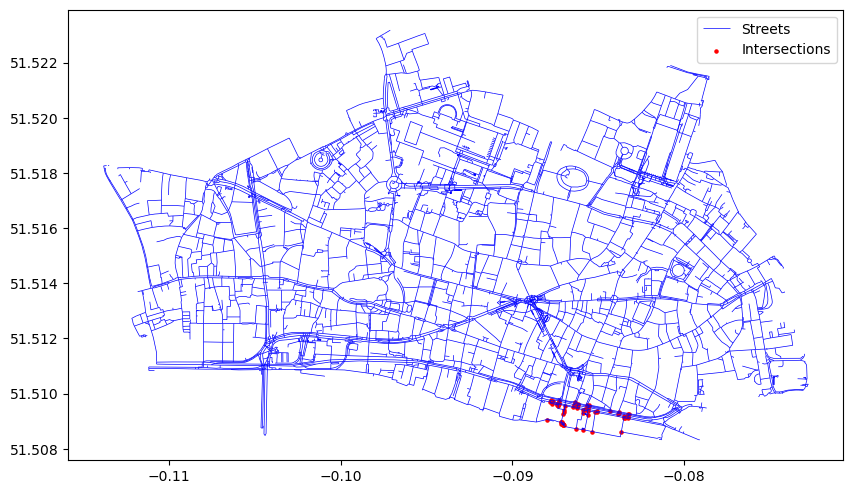

In [86]:

# Assuming intersection_gdf is already created and contains intersection points
# intersection_gdf = gpd.GeoDataFrame(...)  # Your existing intersection GeoDataFrame

# Plot the streets and intersection points
fig, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, color='blue', linewidth=0.5, label='Streets')
intersection_gdf_unique.plot(ax=ax, color='red', marker='o', markersize=5, label='Intersections')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [87]:
intersection_gdf_unique.explore()

In [88]:
import geopandas as gpd
from shapely.geometry import LineString, Point
from shapely.ops import split

# Load the streets data if not already loaded
streets = gpd.read_file('London_UK/network/edges/edges.geojson')

# Ensure intersection points are unique
intersection_points = intersection_gdf_unique['geometry'].unique()

# Function to split a line at given points
def split_line_at_points(line, points):
    # Sort points along the line
    points = sorted(points, key=lambda point: line.project(point))
    # Split the line at each point
    segments = []
    for point in points:
        # Split the line at the point
        split_result = split(line, point)
        # Add the segments to the list
        segments.extend(split_result.geoms)
    return segments

# List to store the split lines
split_lines = []

# Iterate over each line in the streets GeoDataFrame
for line in streets['geometry']:
    # Find intersection points that lie on the current line
    line_points = [point for point in intersection_points if line.intersects(point)]
    if line_points:
        # Split the line at these points
        split_segments = split_line_at_points(line, line_points)
        split_lines.extend(split_segments)
    else:
        # If no intersection points, add the line as is
        split_lines.append(line)

# Create a new GeoDataFrame with the split lines
split_streets_gdf = gpd.GeoDataFrame(geometry=split_lines, crs=streets.crs)

# Display the result
print(split_streets_gdf)

                                               geometry
0     LINESTRING (-0.08366 51.50861, -0.08371 51.508...
1     LINESTRING (-0.08366 51.50861, -0.08371 51.508...
2      LINESTRING (-0.08589 51.5087, -0.08535 51.50862)
3      LINESTRING (-0.08589 51.5087, -0.08535 51.50862)
4     LINESTRING (-0.08589 51.5087, -0.08623 51.5087...
...                                                 ...
5557  LINESTRING (-0.08074 51.52074, -0.08054 51.52069)
5558   LINESTRING (-0.08074 51.52074, -0.0811 51.52082)
5559  LINESTRING (-0.081 51.52181, -0.08098 51.52184...
5560    LINESTRING (-0.0808 51.5219, -0.08076 51.52189)
5561  LINESTRING (-0.08076 51.52189, -0.07979 51.521...

[5562 rows x 1 columns]


In [89]:
split_streets_gdf.length

/var/folders/bm/sxsv4gs910ldhzb8ckc3py9r0000gn/T/ipykernel_93320/713506677.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  split_streets_gdf.length


0       0.001836
1       0.001836
2       0.000541
3       0.000541
4       0.000396
          ...   
5557    0.000206
5558    0.000365
5559    0.001572
5560    0.000042
5561    0.001314
Length: 5562, dtype: float64

In [90]:
import geopandas as gpd

# Ensure the GeoDataFrame is in a projected CRS
# For example, using EPSG:27700 (British National Grid) or any other suitable projected CRS
if split_streets_gdf.crs.is_geographic:
    split_streets_gdf = split_streets_gdf.to_crs(epsg=27700)

# Calculate the length of each LineString
split_streets_gdf['length'] = split_streets_gdf.length

# Display the result
print(split_streets_gdf[['geometry', 'length']])

                                               geometry      length
0     LINESTRING (533088.395 180594.243, 533085.231 ...  135.904422
1     LINESTRING (533088.395 180594.243, 533085.231 ...  135.904422
2     LINESTRING (532933.586 180599.517, 532971.003 ...   38.068525
3     LINESTRING (532933.586 180599.517, 532971.003 ...   38.068525
4     LINESTRING (532933.586 180599.517, 532909.46 1...   27.608691
...                                                 ...         ...
5557  LINESTRING (533255.301 181947.567, 533269.285 ...   14.891608
5558  LINESTRING (533255.301 181947.567, 533230.466 ...   26.361736
5559  LINESTRING (533234.109 182066.592, 533235.408 ...  113.544303
5560  LINESTRING (533248.024 182076.772, 533250.862 ...    3.006611
5561  LINESTRING (533250.862 182075.778, 533318.992 ...   94.308662

[5562 rows x 2 columns]


In [91]:
import geopandas as gpd
import folium  # Import folium for map controls



# Ensure intersection_gdf_unique is in the same CRS as streets
intersection_gdf_unique = intersection_gdf_unique.to_crs(streets.crs)

# Use the .explore() method to visualize both GeoDataFrames
m = split_streets_gdf.explore(
    color='blue',  # Color for streets
    tooltip='length',  # Tooltip to show length if available
    name='Streets'
)

intersection_gdf_unique.explore(
    m=m,
    color='red',  # Color for intersection points
    marker_kwds={'radius': 5},  # Marker size for points
    name='Intersection Points'
)

# Add layer control to toggle between layers
m.add_child(folium.LayerControl())

# Display the map
m


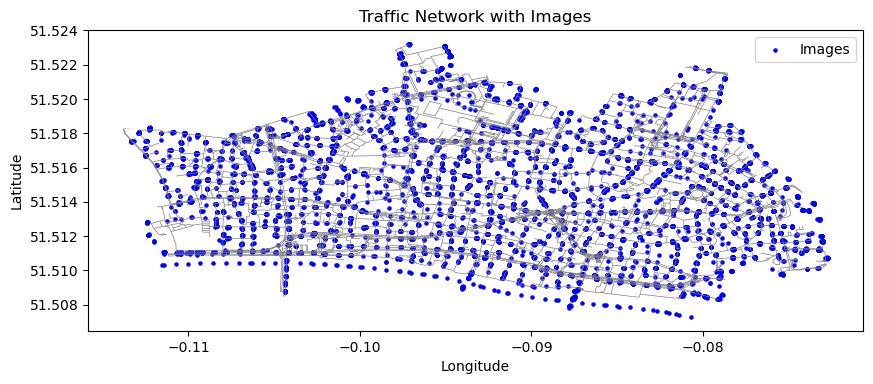

In [92]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

# Load street network data
# streets = gpd.read_file('streets.geojson')  # Replace with your data source

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3', ...],
#     'lng': [-0.10543, -0.0949, -0.10601, ...],
#     'lat': [51.51575, 51.51736, 51.51575, ...]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=27700)

# Perform Spatial Join to find nearest street for each image
matched = gpd.sjoin_nearest(images_gdf, split_streets_gdf, how='left', distance_col='distance')
# Function to get coordinates by image ID
def get_coords_by_image_id(image_id):
    row = matched[matched['image_id'] == image_id]
    if not row.empty:
        return row['geometry'].values[0].x, row['geometry'].values[0].y
    else:
        return None, None

# Visualize the traffic network with images
fig, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, color='gray', linewidth=0.5)
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images')
plt.legend()

plt.show()

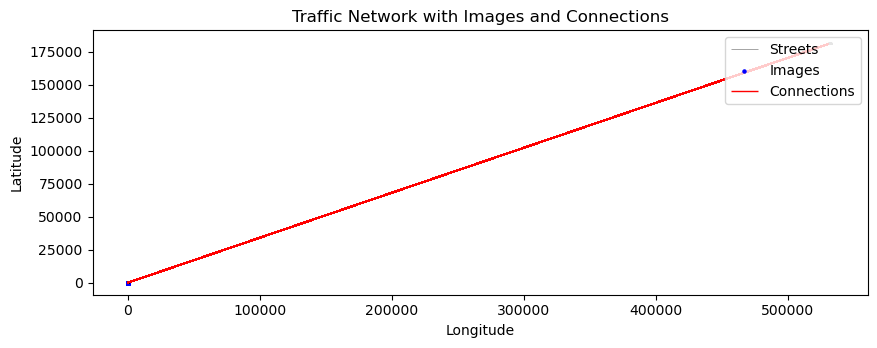

In [93]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=split_streets_gdf.crs)

# Perform Spatial Join to find nearest street for each image
matched = gpd.sjoin_nearest(images_gdf, split_streets_gdf, how='left', distance_col='distance')

# Create lines connecting images to their nearest street
connecting_lines = []
for idx, row in matched.iterrows():
    image_point = row['geometry']
    nearest_line_index = row['index_right']  # This is the index of the nearest line
    nearest_line = split_streets_gdf.loc[nearest_line_index, 'geometry']  # Get the actual LineString
    connecting_line = LineString([image_point, nearest_line.interpolate(nearest_line.project(image_point))])
    connecting_lines.append(connecting_line)

# Create a GeoDataFrame for the connecting lines
connecting_lines_gdf = gpd.GeoDataFrame(geometry=connecting_lines, crs=split_streets_gdf.crs)

# Visualize the traffic network with images and connecting lines
fig, ax = plt.subplots(figsize=(10, 10))
split_streets_gdf.plot(ax=ax, color='gray', linewidth=0.5, label='Streets')
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')
connecting_lines_gdf.plot(ax=ax, color='red', linewidth=1, label='Connections')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images and Connections')
plt.legend()

plt.show()

/Users/tangshiya/anaconda3/envs/DSAIE/lib/python3.9/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


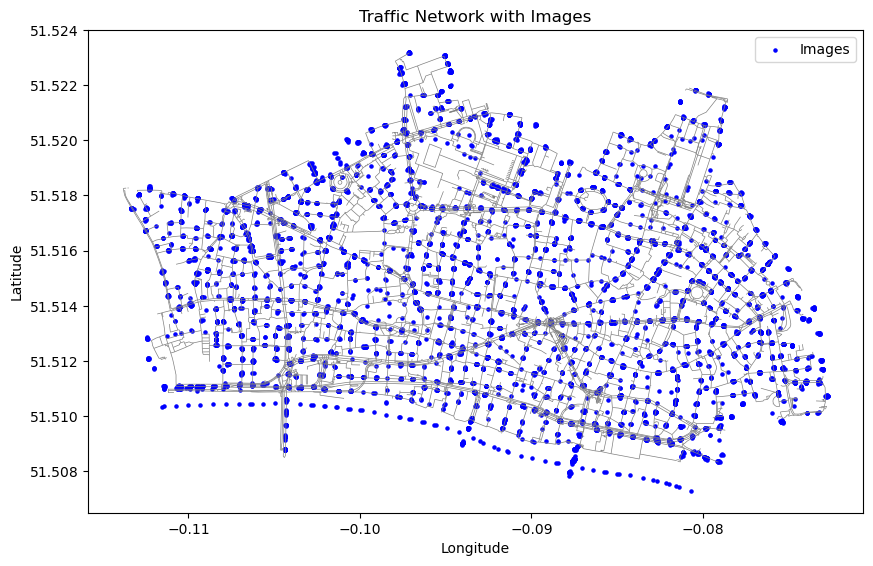

In [94]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load street network data
# streets = gpd.read_file('streets.geojson')  # Replace with your data source

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]


images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Ensure merged_streets_gdf is in the same CRS as images_gdf
merged_streets_gdf = merged_streets_gdf.to_crs(images_gdf.crs)

# Perform Spatial Join to find nearest street for each image
matched = gpd.sjoin_nearest(images_gdf, merged_streets_gdf, how='left', distance_col='distance')

# Function to get coordinates by image ID
def get_coords_by_image_id(image_id):
    row = matched[matched['image_id'] == image_id]
    if not row.empty:
        return row['geometry'].values[0].x, row['geometry'].values[0].y
    else:
        return None, None

# Visualize the traffic network with images
fig, ax = plt.subplots(figsize=(10, 10))
streets.plot(ax=ax, color='gray', linewidth=0.5)
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images')
plt.legend()
plt.show()

/Users/tangshiya/anaconda3/envs/DSAIE/lib/python3.9/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


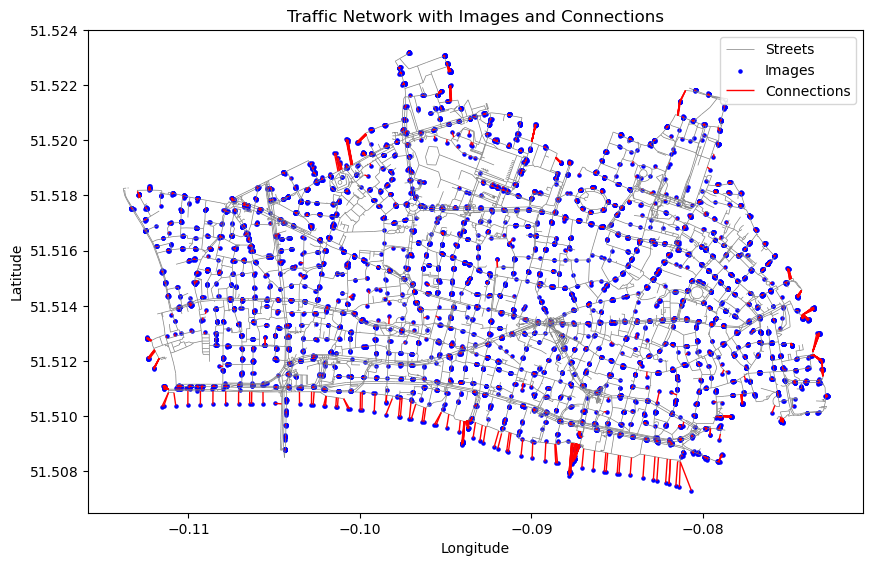

In [95]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Ensure merged_streets_gdf is in the same CRS as images_gdf
merged_streets_gdf = merged_streets_gdf.to_crs(images_gdf.crs)

# Perform Spatial Join to find nearest street for each image
matched = gpd.sjoin_nearest(images_gdf, merged_streets_gdf, how='left', distance_col='distance')

# Create lines connecting images to their nearest street
connecting_lines = []
for idx, row in matched.iterrows():
    image_point = row['geometry']
    nearest_line_index = row['index_right']  # This is the index of the nearest line
    nearest_line = merged_streets_gdf.loc[nearest_line_index, 'geometry']  # Get the actual LineString
    connecting_line = LineString([image_point, nearest_line.interpolate(nearest_line.project(image_point))])
    connecting_lines.append(connecting_line)

# Create a GeoDataFrame for the connecting lines
connecting_lines_gdf = gpd.GeoDataFrame(geometry=connecting_lines, crs=merged_streets_gdf.crs)

# Visualize the traffic network with images and connecting lines
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='gray', linewidth=0.5, label='Streets')
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')
connecting_lines_gdf.plot(ax=ax, color='red', linewidth=1, label='Connections')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images and Connections')
plt.legend()
plt.show()




In [96]:
len(matched)

9137

In [97]:
len(connecting_lines_gdf)

9137

/Users/tangshiya/anaconda3/envs/DSAIE/lib/python3.9/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


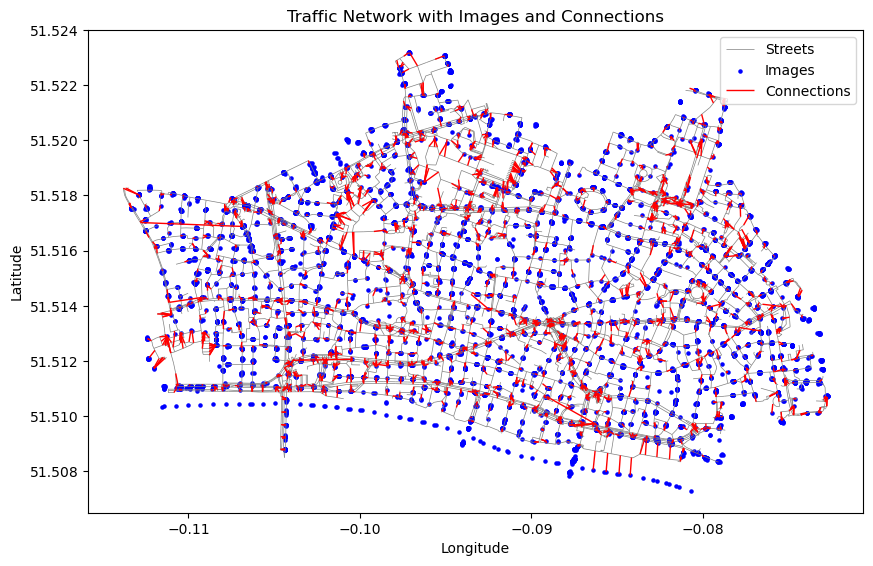

In [98]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Ensure merged_streets_gdf is in the same CRS as images_gdf
merged_streets_gdf = merged_streets_gdf.to_crs(images_gdf.crs)

# Perform Spatial Join to find nearest image for each street segment
matched = gpd.sjoin_nearest(merged_streets_gdf, images_gdf, how='left', distance_col='distance')

# Create lines connecting each street segment to its nearest image
connecting_lines = []
for idx, row in matched.iterrows():
    line_segment = row['geometry']
    nearest_image_index = row['index_right']  # This is the index of the nearest image
    nearest_image_point = images_gdf.loc[nearest_image_index, 'geometry']  # Get the actual Point
    connecting_line = LineString([line_segment.interpolate(line_segment.project(nearest_image_point)), nearest_image_point])
    connecting_lines.append(connecting_line)

# Create a GeoDataFrame for the connecting lines
connecting_lines_gdf = gpd.GeoDataFrame(geometry=connecting_lines, crs=merged_streets_gdf.crs)

# Visualize the traffic network with images and connecting lines
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='gray', linewidth=0.5, label='Streets')
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')
connecting_lines_gdf.plot(ax=ax, color='red', linewidth=1, label='Connections')

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images and Connections')
plt.legend()
plt.show()

/Users/tangshiya/anaconda3/envs/DSAIE/lib/python3.9/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


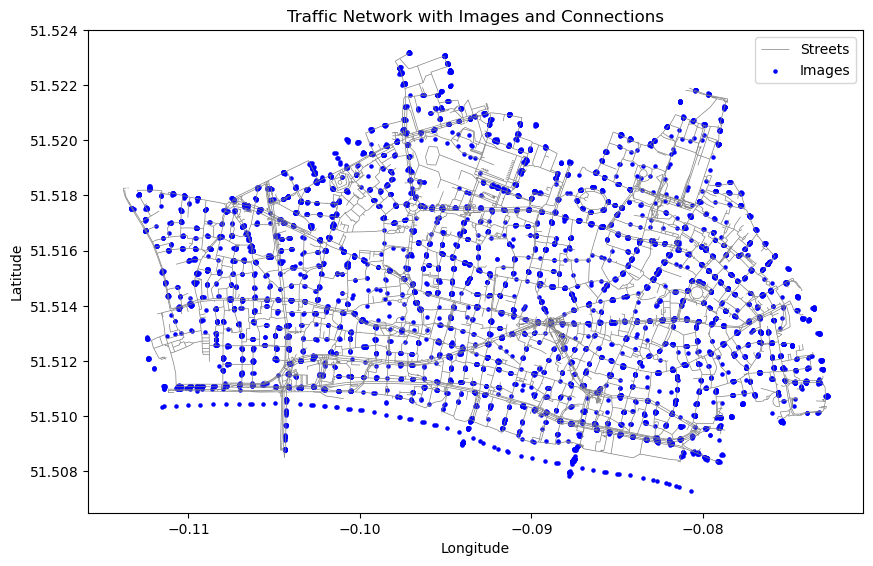

In [99]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Ensure merged_streets_gdf is in the same CRS as images_gdf
merged_streets_gdf = merged_streets_gdf.to_crs(images_gdf.crs)

# Perform Spatial Join to find nearest image for each street segment
matched = gpd.sjoin_nearest(merged_streets_gdf, images_gdf, how='left', distance_col='distance')

# Sort by distance and drop duplicates to keep only the closest image per street
matched = matched.sort_values(by='distance').drop_duplicates(subset='index_right')



# Visualize the traffic network with images and connecting lines
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='gray', linewidth=0.5, label='Streets')
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')


# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images and Connections')
plt.legend()
plt.show()

In [100]:
matched.head()

geometry     length  category  \
3433  LINESTRING (-0.10162 51.51682, -0.10144 51.51722)  46.752228         3   
2480  LINESTRING (-0.07906 51.51394, -0.07902 51.513...  55.499614         3   
1573    LINESTRING (-0.1049 51.5132, -0.10494 51.51287)  36.906024         2   
2766  LINESTRING (-0.07714 51.51531, -0.07786 51.51481)  75.137535         4   
144    LINESTRING (-0.08913 51.51009, -0.0891 51.51013)   5.241560         1   

      index_right  image_id                  panoid  longitude   latitude  \
3433         3110      3110  Lxjlfeqma-fmmp7bqx2z2A  -0.101598  51.516877   
2480         6554      6554  pCoL-Vcale4s9OeByQoVhQ  -0.078707  51.513825   
1573          621       621  WO_hwz7ESVTcBXTj7dE-3w  -0.104931  51.512950   
2766         8249      8249  LPVPWF5yzUrYNofMZiBtQQ  -0.077190  51.515277   
144          4747      4747  0BST0dIwMfDw0nFeg1pLrQ  -0.089108  51.510121   

          distance  
3433  2.902476e-09  
2480  3.985734e-09  
1573  6.249500e-09  
2766  8.554293e-09  
144   1.219229e-08

/Users/tangshiya/anaconda3/envs/DSAIE/lib/python3.9/site-packages/geopandas/array.py:403: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


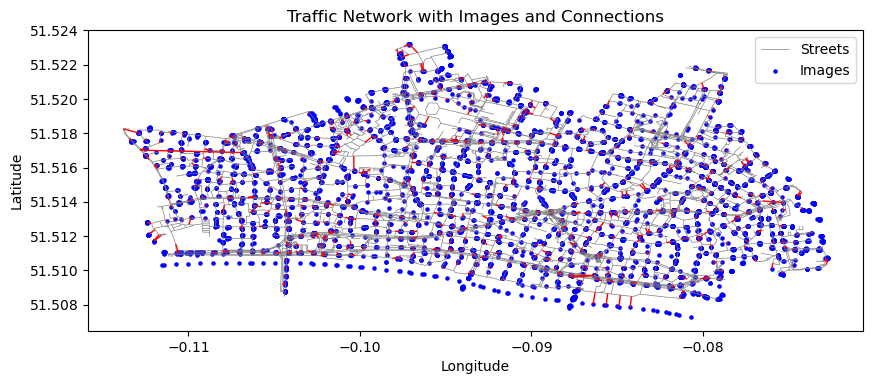

In [101]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })

# Create a DataFrame with image IDs and their corresponding GPS coordinates
image_data = {
    'image_id': np.arange(len(panoids)),
    'panoid': panoids.panoid,
    'longitude': panoids.lng,
    'latitude': panoids.lat,
}
images_df = pd.DataFrame(image_data)

# Create GeoDataFrame for images
geometry = [Point(xy) for xy in zip(images_df['longitude'], images_df['latitude'])]
images_gdf = gpd.GeoDataFrame(images_df, geometry=geometry, crs=streets.crs)

# Ensure merged_streets_gdf is in the same CRS as images_gdf
merged_streets_gdf = merged_streets_gdf.to_crs(images_gdf.crs)

# Perform Spatial Join to find nearest image for each street segment
matched = gpd.sjoin_nearest(merged_streets_gdf, images_gdf, how='left', distance_col='distance')

# Sort by distance
matched = matched.sort_values(by='distance')

# Keep track of used image IDs
used_image_ids = set()
selected_matches = []

# Iterate over the sorted matches
for idx, row in matched.iterrows():
    image_id = row['image_id']
    if image_id not in used_image_ids:
        selected_matches.append(row)
        used_image_ids.add(image_id)

# Create a GeoDataFrame for the selected matches
selected_matches_gdf = gpd.GeoDataFrame(selected_matches, crs=merged_streets_gdf.crs)

# Visualize the traffic network with images and connecting lines
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='gray', linewidth=0.5, label='Streets')
images_gdf.plot(ax=ax, color='blue', markersize=5, label='Images')

# Plot connections
for idx, row in selected_matches_gdf.iterrows():
    line_segment = row['geometry']
    nearest_image_point = images_gdf.loc[row['index_right'], 'geometry']
    connecting_line = LineString([line_segment.interpolate(line_segment.project(nearest_image_point)), nearest_image_point])
    gpd.GeoSeries([connecting_line]).plot(ax=ax, color='red', linewidth=1)

# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Traffic Network with Images and Connections')
plt.legend()
plt.show()

In [102]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# Assuming streets and panoids GeoDataFrames are already loaded
# streets = gpd.read_file('London_UK/network/edges/edges.geojson')
# panoids = gpd.read_file('path/to/panoids.geojson')  # Replace with your actual path

# Create a buffer of 20 meters around each LineString
streets['buffer'] = streets.geometry.buffer(20)

# Create a GeoDataFrame for panoids if not already done
# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })
panoids_gdf = gpd.GeoDataFrame(
    panoids,
    geometry=[Point(xy) for xy in zip(panoids['lng'], panoids['lat'])],
    crs=streets.crs
)

# Perform a spatial join to find which panoids fall within the buffer
panoids_in_buffer = gpd.sjoin(panoids_gdf, streets.set_geometry('buffer'), how='inner', predicate='within')

# Print the result
print(panoids_in_buffer)

/var/folders/bm/sxsv4gs910ldhzb8ckc3py9r0000gn/T/ipykernel_93320/584076300.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  streets['buffer'] = streets.geometry.buffer(20)


                      panoid  year  month   owner        lat       lng  \
0     wFmLm4GhS7AYVonj6tRIJw  2013      8  Google  51.510414 -0.107827   
0     wFmLm4GhS7AYVonj6tRIJw  2013      8  Google  51.510414 -0.107827   
0     wFmLm4GhS7AYVonj6tRIJw  2013      8  Google  51.510414 -0.107827   
0     wFmLm4GhS7AYVonj6tRIJw  2013      8  Google  51.510414 -0.107827   
0     wFmLm4GhS7AYVonj6tRIJw  2013      8  Google  51.510414 -0.107827   
...                      ...   ...    ...     ...        ...       ...   
9012  IcMZAaZ7XoIJ_Jit2qbNOA  2021     12  Google  51.521811 -0.080411   
9012  IcMZAaZ7XoIJ_Jit2qbNOA  2021     12  Google  51.521811 -0.080411   
9012  IcMZAaZ7XoIJ_Jit2qbNOA  2021     12  Google  51.521811 -0.080411   
9012  IcMZAaZ7XoIJ_Jit2qbNOA  2021     12  Google  51.521811 -0.080411   
9012  IcMZAaZ7XoIJ_Jit2qbNOA  2021     12  Google  51.521811 -0.080411   

       ask_lng    ask_lat  consulted       dist  ...           im_side_b  \
0    -0.107849  51.510254          

KeyboardInterrupt: 

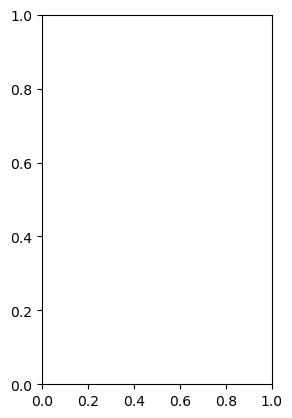

In [103]:
panoids_in_buffer.plot()

In [104]:
merged_streets_gdf['buffer'] = merged_streets_gdf.geometry.buffer(20)

/var/folders/bm/sxsv4gs910ldhzb8ckc3py9r0000gn/T/ipykernel_93320/2300134311.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_streets_gdf['buffer'] = merged_streets_gdf.geometry.buffer(20)


In [105]:
merged_streets_gdf['buffer']


0       POLYGON ((6.28572 32.54995, 4.39679 32.01689, ...
1       POLYGON ((-2.4162 31.64491, -4.35195 31.96909,...
2       POLYGON ((-2.37082 31.63964, -4.30731 31.95933...
3       POLYGON ((2.56906 71.33169, 4.49928 70.97606, ...
4       POLYGON ((-1.68571 31.57279, -1.68479 31.58427...
                              ...                        
5029    POLYGON ((1.13514 71.4848, 3.08601 71.26952, 5...
5030    POLYGON ((3.90482 71.12068, 5.80667 70.63573, ...
5031    POLYGON ((2.9105 71.29683, 4.83442 70.90854, 6...
5032    POLYGON ((4.53216 70.98264, 6.41744 70.43679, ...
5033    POLYGON ((2.55784 71.34517, 2.55807 71.34694, ...
Name: buffer, Length: 5034, dtype: geometry

In [106]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# Assuming merged_streets_gdf and panoids DataFrames are already loaded
# merged_streets_gdf = gpd.read_file('path/to/merged_streets.geojson')  # Replace with your actual path
# panoids = pd.read_file('path/to/panoids.csv')  # Replace with your actual path

# Create a GeoDataFrame for panoids if not already done
# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })
panoids_gdf = gpd.GeoDataFrame(
    panoids,
    geometry=[Point(xy) for xy in zip(panoids['lng'], panoids['lat'])],
    crs=merged_streets_gdf.crs
)

# Ensure both GeoDataFrames are in the same CRS
if merged_streets_gdf.crs != panoids_gdf.crs:
    panoids_gdf = panoids_gdf.to_crs(merged_streets_gdf.crs)

# Create a buffer of 20 meters around each LineString in merged_streets_gdf
merged_streets_gdf['buffer'] = merged_streets_gdf.geometry.buffer(20)

# Perform a spatial join to find which panoids fall within the buffer
panoids_in_buffer = gpd.sjoin(merged_streets_gdf.set_geometry('buffer'), panoids.set_geometry['geometry'], how='left', predicate='within')

# Print the result
panoids_in_buffer.head()

/var/folders/bm/sxsv4gs910ldhzb8ckc3py9r0000gn/T/ipykernel_93320/1671120547.py:28: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged_streets_gdf['buffer'] = merged_streets_gdf.geometry.buffer(20)


TypeError: 'method' object is not subscriptable

In [38]:
from shapely.geometry import LineString
from shapely.geometry import mapping
from shapely.ops import unary_union

# Define your LineString
line = LineString([(0, 0), (10, 10), (20, 0)])

# Create a buffer of 20 meters around the LineString
buffered_zone = line.buffer(20)

# Print or visualize the buffer
print(buffered_zone)


POLYGON ((-4.142135623730949 24.14213562373095, -2.687865683272907 25.46020906725474, -1.11140466039204 26.629392246050905, 0.5720652634800452 27.638425286967102, 2.346331352698206 28.477590650225736, 4.194306454910757 29.13880671464418, 6.098193559677436 29.61570560806461, 8.039657193408788 29.90369453344394, 10.000000000000002 30, 11.960342806591216 29.903694533443936, 13.901806440322567 29.61570560806461, 15.805693545089246 29.138806714644176, 17.653668647301796 28.477590650225736, 19.42793473651996 27.6384252869671, 21.111404660392047 26.629392246050905, 22.68786568327291 25.460209067254738, 24.14213562373095 24.14213562373095, 34.14213562373095 14.14213562373095, 35.46020906725474 12.68786568327291, 36.629392246050905 11.111404660392044, 37.638425286967106 9.427934736519953, 38.477590650225736 7.653668647301796, 39.138806714644176 5.805693545089246, 39.61570560806461 3.9018064403225647, 39.90369453344394 1.960342806591212, 40 0, 39.90369453344394 -1.960342806591212, 39.61570560806

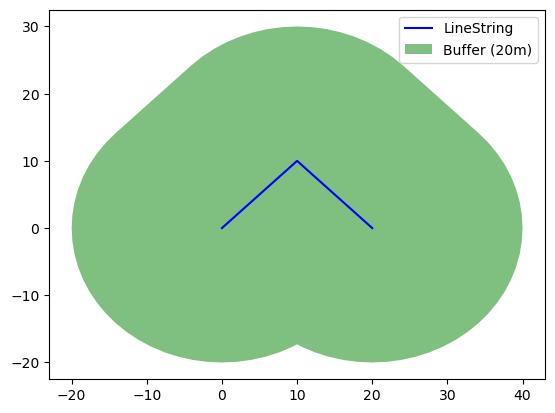

In [ ]:
import matplotlib.pyplot as plt

# Plot the original LineString
x, y = line.xy
plt.plot(x, y, color='blue', label='LineString')

# Plot the buffer
x, y = buffered_zone.exterior.xy
plt.fill(x, y, alpha=0.5, fc='green', label='Buffer (20m)')

plt.legend()
plt.show()


In [107]:
panoids.head()

panoid  year  month   owner        lat       lng   ask_lng  \
0  wFmLm4GhS7AYVonj6tRIJw  2013      8  Google  51.510414 -0.107827 -0.107849   
1  ITjfv5l9KG5ImWa7eTOzAw  2013      8  Google  51.510418 -0.107077 -0.107130   
2  WeKFQgVRtO_lzp_4gT1HQw  2013      8  Google  51.510413 -0.108574 -0.108569   
3  Lm1UtkHFMqfCPgewzinz6Q  2012      5  Google  51.510975 -0.108627 -0.108540   
4  AU89QzVV0jU915gldn3wrQ  2012      5  Google  51.510957 -0.108001 -0.107821   

     ask_lat  consulted       dist   angle  \
0  51.510254          1  52.594483  -2.042   
1  51.510236          1  51.758882  -0.983   
2  51.510271          1  53.597746  -0.960   
3  51.510720          1   2.179497  -1.842   
4  51.510703          1   0.275642 -78.482   

                                          url_side_a  \
0  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
1  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
2  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
3  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
4  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   

                                           url_front  \
0  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
1  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
2  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
3  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
4  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   

                                          url_side_b  \
0  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
1  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
2  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
3  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   
4  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...   

                                            url_back        im_side_a  \
0  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...  image_0_s_a.png   
1  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...  image_1_s_a.png   
2  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...  image_2_s_a.png   
3  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...  image_3_s_a.png   
4  https://geo0.ggpht.com/cbk?cb_client=maps_sv.t...  image_4_s_a.png   

        im_front        im_side_b        im_back                   geometry  
0  image_0_f.png  image_0_s_b.png  image_0_b.png  POINT (-0.10783 51.51041)  
1  image_1_f.png  image_1_s_b.png  image_1_b.png  POINT (-0.10708 51.51042)  
2  image_2_f.png  image_2_s_b.png  image_2_b.png  POINT (-0.10857 51.51041)  
3  image_3_f.png  image_3_s_b.png  image_3_b.png  POINT (-0.10863 51.51098)  
4  image_4_f.png  image_4_s_b.png  image_4_b.png    POINT (-0.108 51.51096)

In [108]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd

# Assuming merged_streets_gdf and panoids DataFrames are already loaded
# merged_streets_gdf = gpd.read_file('path/to/merged_streets.geojson')  # Replace with your actual path
# panoids = pd.read_csv('path/to/panoids.csv')  # Replace with your actual path

# Create a GeoDataFrame for panoids
# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })
panoids_gdf = gpd.GeoDataFrame(
    panoids,
    geometry=[Point(xy) for xy in zip(panoids['lng'], panoids['lat'])],
    crs=merged_streets_gdf.crs  # Assuming WGS 84
)

# Reproject to a projected CRS if necessary
if merged_streets_gdf.crs.is_geographic:
    merged_streets_gdf = merged_streets_gdf.to_crs(epsg=27700)  # British National Grid
    panoids_gdf = panoids_gdf.to_crs(merged_streets_gdf.crs)

# Create a buffer of 20 meters around each LineString
merged_streets_gdf['buffer'] = merged_streets_gdf.geometry.buffer(20)

# Initialize a list to store results
assigned_panoids = []

# Iterate over each buffer and check if panoids fall within the bounding box
for idx, row in merged_streets_gdf.iterrows():
    buffer_bounds = row['buffer'].bounds  # Get the bounding box of the buffer
    minx, miny, maxx, maxy = buffer_bounds
    
    # Find panoids within the bounding box
    panoids_in_bounds = panoids_gdf.cx[minx:maxx, miny:maxy]
    
    # Assign panoids to the current LineString
    for _, panoid_row in panoids_in_bounds.iterrows():
        assigned_panoids.append({
            'line_id': idx,
            'panoid': panoid_row['panoid'],
            'lng': panoid_row['lng'],
            'lat': panoid_row['lat']
        })

# Convert the results to a DataFrame
assigned_panoids_df = pd.DataFrame(assigned_panoids)

# Print the result
print(assigned_panoids_df)

       line_id                  panoid       lng        lat
0            5  xdou9yN5jG9HVTpAHFIKNA -0.085451  51.509351
1            6  1-KfA6fIxR0P8DPXQVwe1Q -0.085499  51.509436
2            6  fcINk0qxC7j6bexbRccWpA -0.085464  51.509437
3            6  Yc4p5GbCANBiE8-LUmJJYw -0.085451  51.509434
4            6  Ym72WsFbvhBpr0D19DxasA -0.085429  51.509405
...        ...                     ...       ...        ...
64761     5033  Vyv2AVAtNUsQaiJkV0vbBw -0.080453  51.521826
64762     5033  mIgXqblx4o94lnfnbg-etA -0.080415  51.521814
64763     5033  hVVggHCCtZ1q2zUBA2Lubg -0.080423  51.521812
64764     5033  BQJZmwnQ8GJvDeEFn7iHeQ -0.080425  51.521810
64765     5033  IcMZAaZ7XoIJ_Jit2qbNOA -0.080411  51.521811

[64766 rows x 4 columns]


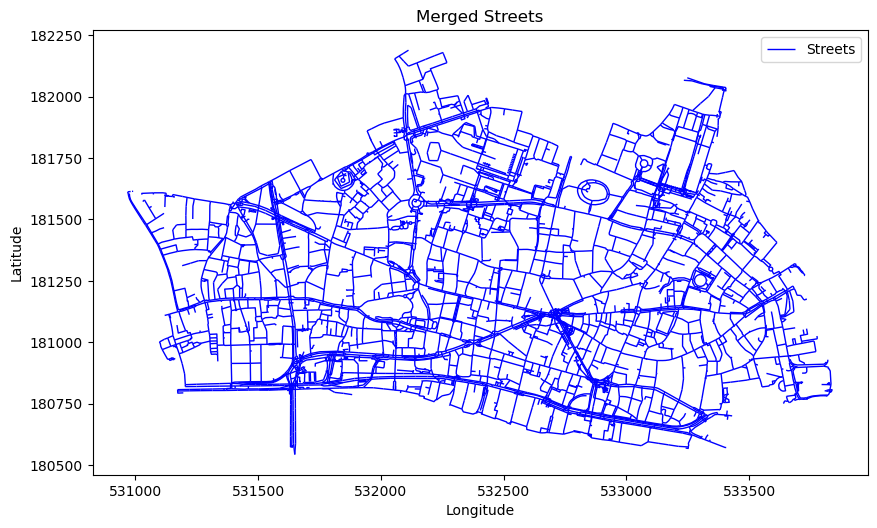

In [109]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming merged_streets_gdf is already loaded
# merged_streets_gdf = gpd.read_file('path/to/merged_streets.geojson')  # Replace with your actual path

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='blue', linewidth=1, label='Streets')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Merged Streets')
plt.legend()

# Show the plot
plt.show()

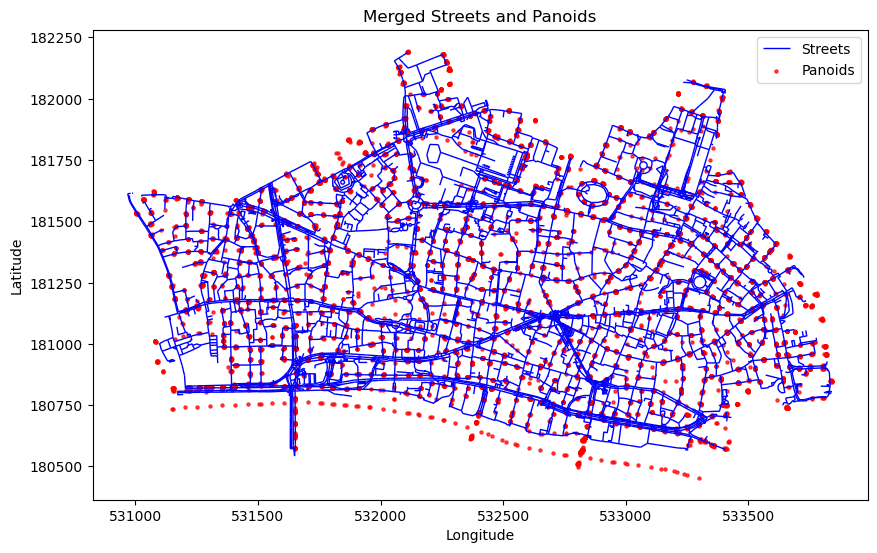

In [110]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Assuming merged_streets_gdf and panoids DataFrames are already loaded
# merged_streets_gdf = gpd.read_file('path/to/merged_streets.geojson')  # Replace with your actual path
# panoids = pd.read_csv('path/to/panoids.csv')  # Replace with your actual path

# Create a GeoDataFrame for panoids
# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })
panoids_gdf = gpd.GeoDataFrame(
    panoids,
    geometry=[Point(xy) for xy in zip(panoids['lng'], panoids['lat'])],
    crs='EPSG:4326'  # Assuming WGS 84
)

# Ensure both GeoDataFrames are in the same CRS
if merged_streets_gdf.crs != panoids_gdf.crs:
    panoids_gdf = panoids_gdf.to_crs(merged_streets_gdf.crs)

# Plot the GeoDataFrames based on geometry
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.geometry.plot(ax=ax, color='blue', linewidth=1, label='Streets')
panoids_gdf.geometry.plot(ax=ax, color='red', markersize=5, label='Panoids', alpha=0.7)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Merged Streets and Panoids')
plt.legend()

# Show the plot
plt.show()

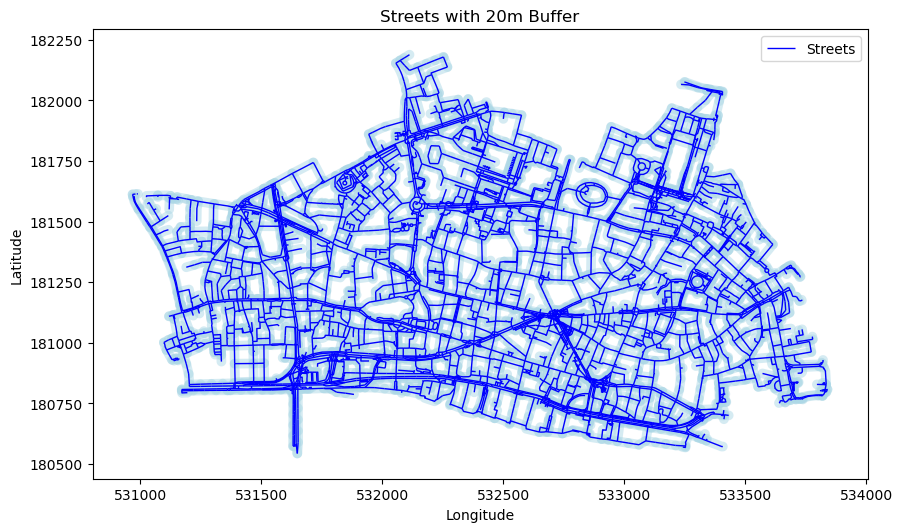

In [111]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Assuming merged_streets_gdf is already loaded
# merged_streets_gdf = gpd.read_file('path/to/merged_streets.geojson')  # Replace with your actual path

# Ensure the GeoDataFrame is in a projected CRS for accurate buffer calculations
if merged_streets_gdf.crs.is_geographic:
    merged_streets_gdf = merged_streets_gdf.to_crs(epsg=27700)  # Example: British National Grid

# Create a buffer of 20 meters around each LineString
merged_streets_gdf['buffer'] = merged_streets_gdf.geometry.buffer(20)

# Plot the original LineStrings and their buffers
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='blue', linewidth=1, label='Streets')
merged_streets_gdf['buffer'].plot(ax=ax, color='lightblue', alpha=0.5, label='Buffer (20m)')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Streets with 20m Buffer')
plt.legend()

# Show the plot
plt.show()

                      panoid  year  month   owner        lat       lng  \
3     Lm1UtkHFMqfCPgewzinz6Q  2012      5  Google  51.510975 -0.108627   
3     Lm1UtkHFMqfCPgewzinz6Q  2012      5  Google  51.510975 -0.108627   
3     Lm1UtkHFMqfCPgewzinz6Q  2012      5  Google  51.510975 -0.108627   
3     Lm1UtkHFMqfCPgewzinz6Q  2012      5  Google  51.510975 -0.108627   
3     Lm1UtkHFMqfCPgewzinz6Q  2012      5  Google  51.510975 -0.108627   
...                      ...   ...    ...     ...        ...       ...   
9011  BQJZmwnQ8GJvDeEFn7iHeQ  2021      4  Google  51.521810 -0.080425   
9011  BQJZmwnQ8GJvDeEFn7iHeQ  2021      4  Google  51.521810 -0.080425   
9012  IcMZAaZ7XoIJ_Jit2qbNOA  2021     12  Google  51.521811 -0.080411   
9012  IcMZAaZ7XoIJ_Jit2qbNOA  2021     12  Google  51.521811 -0.080411   
9012  IcMZAaZ7XoIJ_Jit2qbNOA  2021     12  Google  51.521811 -0.080411   

      ask_lng    ask_lat  consulted      dist  ...  \
3    -0.10854  51.510720          1  2.179497  ...   
3  

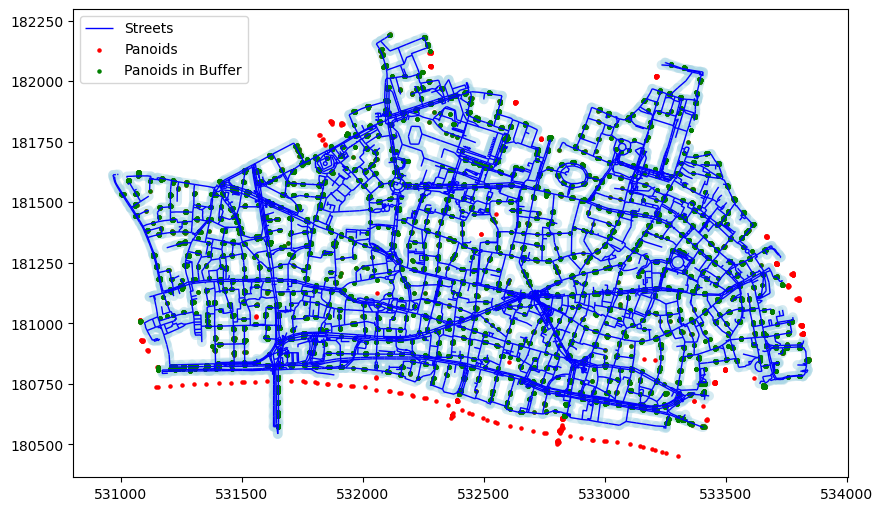

In [112]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_streets_gdf and panoids DataFrames are already loaded
# merged_streets_gdf = gpd.read_file('path/to/merged_streets.geojson')  # Replace with your actual path
# panoids = pd.read_csv('path/to/panoids.csv')  # Replace with your actual path

# Create a GeoDataFrame for panoids
# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })
panoids_gdf = gpd.GeoDataFrame(
    panoids,
    geometry=[Point(xy) for xy in zip(panoids['lng'], panoids['lat'])],
    crs='EPSG:4326'  # Assuming WGS 84
)

# Ensure both GeoDataFrames are in the same CRS
if merged_streets_gdf.crs != panoids_gdf.crs:
    panoids_gdf = panoids_gdf.to_crs(merged_streets_gdf.crs)

# Create a buffer of 20 meters around each LineString
merged_streets_gdf['buffer'] = merged_streets_gdf.geometry.buffer(20)

# Perform a spatial join to find which panoids fall within the buffer
panoids_in_buffer = gpd.sjoin(panoids_gdf, merged_streets_gdf.set_geometry('buffer'), how='inner', predicate='within')

# Print the result
print(panoids_in_buffer)

# Visualize the data
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='blue', linewidth=1, label='Streets')
merged_streets_gdf['buffer'].plot(ax=ax, color='lightblue', alpha=0.5, label='Buffer (20m)')
panoids_gdf.plot(ax=ax, color='red', markersize=5, label='Panoids')
panoids_in_buffer.plot(ax=ax, color='green', markersize=5, label='Panoids in Buffer')
plt.legend()
plt.show()

      index_right                                             panoid
0               5                           [xdou9yN5jG9HVTpAHFIKNA]
1               6   [Ym72WsFbvhBpr0D19DxasA, xdou9yN5jG9HVTpAHFIKNA]
2               8                           [xdou9yN5jG9HVTpAHFIKNA]
3               9  [xHxCUvX5chMOydy9WdcHRA, g6G6Rza4wCHAFyyGH1lF0...
4              10  [DW0rSBghzK_zKlEqzFS07w, hO7nswlVtu2Qa9I2y0oLN...
...           ...                                                ...
4292         5028  [VgB1-T_mMoImrsdbc9pAZA, ruQvGAcacOZK2SC3zwoKT...
4293         5029  [7J9WBdGzbtCgxIEvdvOQLA, aFng_NDdLw5gnmuWuEoNl...
4294         5030  [7J9WBdGzbtCgxIEvdvOQLA, aFng_NDdLw5gnmuWuEoNl...
4295         5031  [L2RO_RaCf8L8fMwryPqJ9Q, zvFAL1gCIrKxLBA6AhLM-...
4296         5033  [L2RO_RaCf8L8fMwryPqJ9Q, zvFAL1gCIrKxLBA6AhLM-...

[4297 rows x 2 columns]


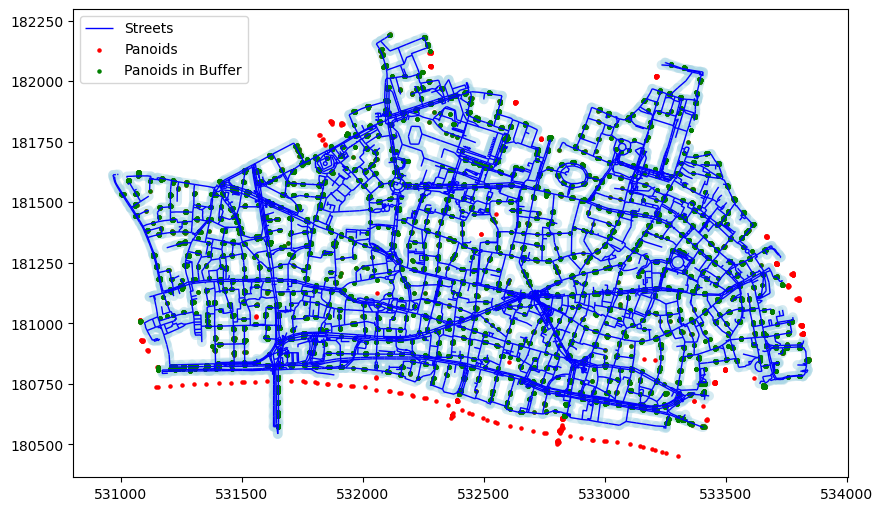

In [113]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_streets_gdf and panoids DataFrames are already loaded
# merged_streets_gdf = gpd.read_file('path/to/merged_streets.geojson')  # Replace with your actual path
# panoids = pd.read_csv('path/to/panoids.csv')  # Replace with your actual path

# Create a GeoDataFrame for panoids
# Assuming panoids DataFrame has columns 'panoid', 'lng', and 'lat'
# Example:
# panoids = pd.DataFrame({
#     'panoid': ['id1', 'id2', 'id3'],
#     'lng': [-0.10543, -0.0949, -0.10601],
#     'lat': [51.51575, 51.51736, 51.51575]
# })
panoids_gdf = gpd.GeoDataFrame(
    panoids,
    geometry=[Point(xy) for xy in zip(panoids['lng'], panoids['lat'])],
    crs='EPSG:4326'  # Assuming WGS 84
)

# Ensure both GeoDataFrames are in the same CRS
if merged_streets_gdf.crs != panoids_gdf.crs:
    panoids_gdf = panoids_gdf.to_crs(merged_streets_gdf.crs)

# Create a buffer of 20 meters around each LineString
merged_streets_gdf['buffer'] = merged_streets_gdf.geometry.buffer(20)

# Perform a spatial join to find which panoids fall within the buffer
panoids_in_buffer = gpd.sjoin(panoids_gdf, merged_streets_gdf.set_geometry('buffer'), how='inner', predicate='within')

# Group by the index of the LineString and aggregate panoids
linestring_panoids = panoids_in_buffer.groupby('index_right')['panoid'].apply(list).reset_index()

# Print the result
print(linestring_panoids)

# Visualize the data
fig, ax = plt.subplots(figsize=(10, 10))
merged_streets_gdf.plot(ax=ax, color='blue', linewidth=1, label='Streets')
merged_streets_gdf['buffer'].plot(ax=ax, color='lightblue', alpha=0.5, label='Buffer (20m)')
panoids_gdf.plot(ax=ax, color='red', markersize=5, label='Panoids')
panoids_in_buffer.plot(ax=ax, color='green', markersize=5, label='Panoids in Buffer')
plt.legend()
plt.show()

# Images to Vector embeddings

In [114]:
import torch
from torchvision import models, transforms
from PIL import Image
import os

In [115]:
print(merged_streets_gdf)

                                               geometry     length  category  \
0     LINESTRING (533088.395 180594.244, 533060.478 ...  32.202141         2   
1     LINESTRING (533060.478 180578.256, 533015.753 ...  45.345370         3   
2     LINESTRING (533015.753 180585.462, 532971.003 ...  45.345382         3   
3     LINESTRING (532933.585 180599.517, 532971.003 ...  38.105447         2   
4     LINESTRING (532933.585 180599.517, 532909.46 1...  27.635476         2   
...                                                 ...        ...       ...   
5029  LINESTRING (533234.108 182066.592, 533267.112 ...  33.118631         2   
5030  LINESTRING (533267.112 182064.242, 533303.392 ...  37.884646         2   
5031  LINESTRING (533303.392 182053.462, 533340.32 1...  37.805940         2   
5032  LINESTRING (533248.024 182076.772, 533250.862 ...   3.009515         1   
5033  LINESTRING (533250.862 182075.778, 533318.992 ...  94.399716         5   

                                       

In [116]:
print(linestring_panoids)


      index_right                                             panoid
0               5                           [xdou9yN5jG9HVTpAHFIKNA]
1               6   [Ym72WsFbvhBpr0D19DxasA, xdou9yN5jG9HVTpAHFIKNA]
2               8                           [xdou9yN5jG9HVTpAHFIKNA]
3               9  [xHxCUvX5chMOydy9WdcHRA, g6G6Rza4wCHAFyyGH1lF0...
4              10  [DW0rSBghzK_zKlEqzFS07w, hO7nswlVtu2Qa9I2y0oLN...
...           ...                                                ...
4292         5028  [VgB1-T_mMoImrsdbc9pAZA, ruQvGAcacOZK2SC3zwoKT...
4293         5029  [7J9WBdGzbtCgxIEvdvOQLA, aFng_NDdLw5gnmuWuEoNl...
4294         5030  [7J9WBdGzbtCgxIEvdvOQLA, aFng_NDdLw5gnmuWuEoNl...
4295         5031  [L2RO_RaCf8L8fMwryPqJ9Q, zvFAL1gCIrKxLBA6AhLM-...
4296         5033  [L2RO_RaCf8L8fMwryPqJ9Q, zvFAL1gCIrKxLBA6AhLM-...

[4297 rows x 2 columns]


In [150]:
# Check unique values in 'index_right' to ensure that 1 is a valid entry
print(linestring_panoids['index_right'].unique())

# Optional: Output the count of each unique value to verify presence of the index
print(linestring_panoids['index_right'].value_counts())


[   5    6    8 ... 5030 5031 5033]
5       1
3306    1
3292    1
3293    1
3294    1
       ..
1656    1
1657    1
1659    1
1661    1
5033    1
Name: index_right, Length: 4297, dtype: int64


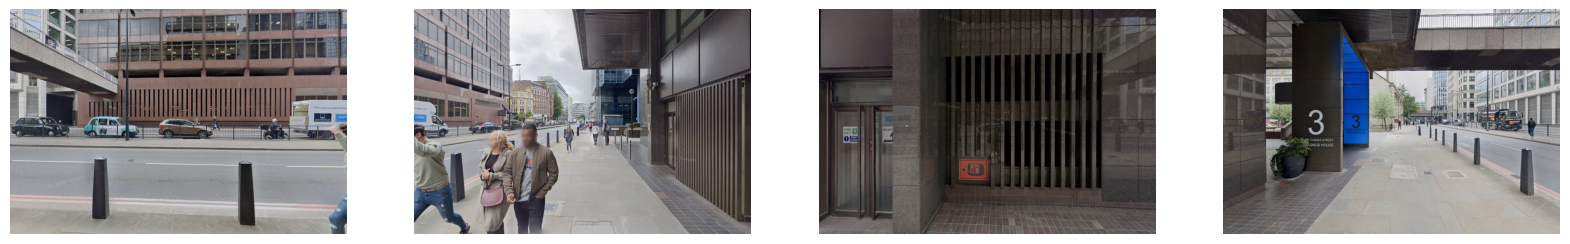

In [166]:
data_path = Path('/Users/tangshiya/DSAIE/London_UK')
panoids = gpd.read_file(data_path / 'panoids/panoids.geojson')
#Showcasing images in panoids
#panoid = 'xdou9yN5jG9HVTpAHFIKNA'
img_path = lambda x: data_path / 'imagedb' / f'{x}'
index_right = 5
filtered_rows = linestring_panoids[linestring_panoids['index_right'] == index_right]

# Check if filtered_rows is empty
if not filtered_rows.empty:
    selected_panoids = filtered_rows['panoid'].iloc[0]
else:
    print(f"No entries found for index_right = {index_right}")
    selected_panoids = []

# Continue only if selected_panoids is not empty
if selected_panoids:
    # Assume panoids contains a 'panoid' field that can be matched
    try:
        # Find corresponding image names in 'panoids' DataFrame and construct full paths
        paths = [img_path(x) for panoid in selected_panoids for x in panoids[panoids['panoid'] == panoid][['im_side_a', 'im_front', 'im_side_b', 'im_back']].values.flatten()]
    except Exception as e:
        print("Error processing data:", e)
        paths = []
else:
    paths = []

# Visualization logic here, using paths
if paths:
    fig, axs = plt.subplots(1, len(paths), figsize=(20, 5))
    for i, path in enumerate(paths):
        try:
            img = Image.open(path)
            axs[i].imshow(img)
            axs[i].axis('off')
        except Exception as e:
            print(f"Error opening image {path}: {e}")
    plt.show()
else:
    print("No images to display.")


In [162]:
# Function to load an image and transform it
def load_image(image_path):
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image

# Function to get embeddings from a model
def get_embeddings(model, image_path):
    """Extracts embeddings from a model given an image path."""
    image = load_image(image_path)
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation
        embeddings = model(image)
    return embeddings

In [163]:
vgg = models.vgg16(pretrained=True)
vgg.classifier[6] = torch.nn.Identity()  # Remove the final classification layer





/Users/tangshiya/anaconda3/envs/DSAIE/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/tangshiya/anaconda3/envs/DSAIE/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [164]:
all_embeddings = []
for path in paths:
    embedding = get_embeddings(vgg, path)
    all_embeddings.append(embedding.numpy())  # Convert to numpy array and append

# Stack embeddings into a numpy array and ensure it's 2D
embeddings_array = np.array(all_embeddings)
embeddings_array = embeddings_array.reshape(len(all_embeddings), -1)  # Reshape to 2D if not already
print("Corrected shape of embeddings array:", embeddings_array.shape)
print(embeddings_array)

Corrected shape of embeddings array: (8, 4096)
[[0.         0.         0.         ... 0.         0.         0.74004793]
 [0.         0.         0.         ... 0.         0.         2.1746552 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.24153979 0.82509947]
 [0.         0.         0.         ... 0.         0.         0.75702965]
 [0.         0.         0.         ... 0.         0.         1.3358021 ]]


In [165]:
import torch
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pathlib import Path
import pandas as pd

# Perform PCA to reduce dimensions, e.g., to 2 for easy visualization
pca = PCA(n_components=4)
reduced_embeddings = pca.fit_transform(embeddings_array)

# Print explained variance ratio to understand the amount of variance captured by the two principal components
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.32722712 0.16964933 0.13821161 0.1265849 ]


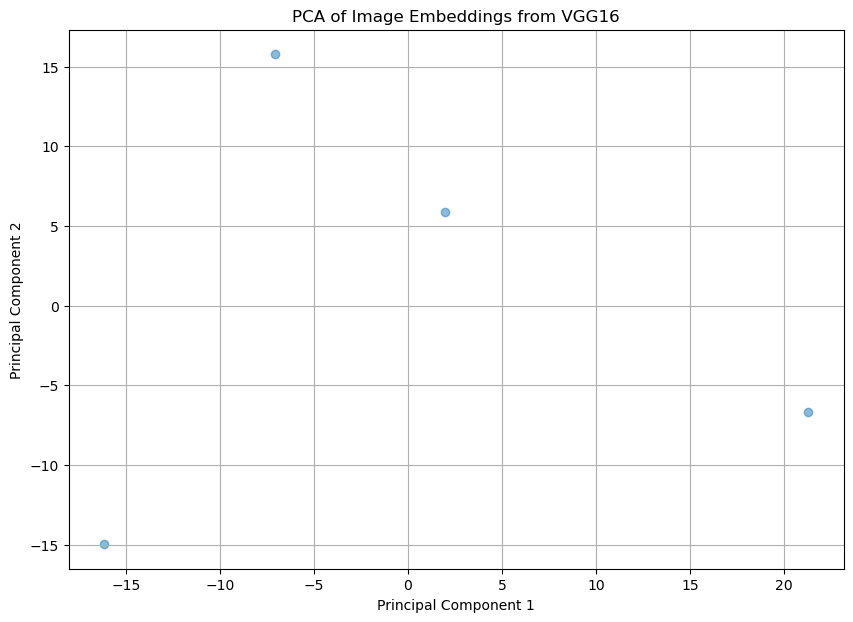

In [157]:
# Plotting the PCA results
plt.figure(figsize=(10, 7))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)
plt.title("PCA of Image Embeddings from VGG16")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [158]:
from sklearn.cluster import KMeans
# Define the number of clusters
k = 2  # Adjust this based on your analysis or methods like the elbow method

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(embeddings_array)

# Print the cluster labels to check the distribution
print("Cluster labels:", clusters)


Cluster labels: [1 1 0 1]


/Users/tangshiya/anaconda3/envs/DSAIE/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [159]:
# Assuming you have performed PCA or have a way to visualize high-dimensional data
# Here's how to plot if you've reduced dimensions to 2D
if embeddings_array.shape[1] == 2:  # Check if data is 2D
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_array[:, 0], embeddings_array[:, 1], c=clusters, cmap='viridis', alpha=0.5)
    plt.colorbar(label='Cluster ID')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering of Image Embeddings')
    plt.show()
else:
    print("Dimensionality reduction might be necessary to visualize the data.")


Dimensionality reduction might be necessary to visualize the data.
